In [61]:
import json
import numpy as np
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt


# Results JSON
We collected results for experiments in on different machines. Here we join them into a single results json file.

In [15]:
# join the genetic_results into a single file
input_files_paths = [
    "output/genetic_results.json",
    "output/genetic_results_2.json",
    "output/genetic_results_3.json",
    "output/genetic_results_4.json"
]
output_file_path = "output/all_genetic_results.json"
all = []
for path in input_files_paths:
    x = json.load(open(path))
    print("+", len(x))
    all += x
print("=", len(all))
json.dump(all, open(output_file_path, "w"))

+ 1342
+ 1440
+ 1127
+ 904
= 4813


# Analyse the genetic results of our first experiments

In [142]:
# load the json
results = json.load(open("output/all_genetic_results.json"))

df = pd.DataFrame(results)
# remove duplicate experiments
df = df.drop_duplicates()
print("Num experiment runs (after removing duplicates):", df.shape[0])
# column for instance names
df = df.rename(columns={"instance": "instance_path"})
df["instance"] = df.instance_path.str.extract(r'/([^/.]+)\.')
df.elitism = df.elitism.round(2)
# sort the results by best fitness
df.sort_values(by=["instance", "best_fitness"], ascending=False, inplace=True)
df#[["instance_path", "instance"]]

Num experiment runs (after removing duplicates): 4388


,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
2408,ihtc2024_test_dataset/test10.json,0.0500,0.60,100,linear_ranked_selection,random_crossover,True,922,-2.069837e+09,test10
2405,ihtc2024_test_dataset/test10.json,0.0500,0.35,100,linear_ranked_selection,random_crossover,False,901,-2.105138e+09,test10
2409,ihtc2024_test_dataset/test10.json,0.0500,0.60,100,linear_ranked_selection,random_crossover,False,999,-2.114137e+09,test10
2356,ihtc2024_test_dataset/test10.json,0.0500,0.35,100,roulette_selection,random_crossover,True,783,-2.120637e+09,test10
2449,ihtc2024_test_dataset/test10.json,0.0500,0.10,100,exponential_ranked_selection,random_crossover,False,566,-2.141937e+09,test10
...,...,...,...,...,...,...,...,...,...,...
4675,ihtc2024_test_dataset/test01.json,0.8333,1.00,10,linear_ranked_selection,random_crossover,False,100,-3.553015e+08,test01
4703,ihtc2024_test_dataset/test01.json,1.0000,1.00,10,linear_ranked_selection,random_crossover,False,100,-3.553015e+08,test01
4731,ihtc2024_test_dataset/test01.json,0.0000,1.00,10,linear_ranked_selection,single_point_crossover,False,100,-3.553015e+08,test01
4759,ihtc2024_test_dataset/test01.json,0.1667,1.00,10,linear_ranked_selection,single_point_crossover,False,100,-3.553015e+08,test01


In [143]:
df.loc[df.groupby("instance").best_fitness.idxmax()]

,instance_path,mutation_rate,elitism,population_size,selection_algorithm,crossover_algorithm,crossover_weighted,generations,best_fitness,instance
2305,ihtc2024_test_dataset/test01.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,276,-1.404022e+08,test01
1973,ihtc2024_test_dataset/test02.json,0.05,0.35,100,linear_ranked_selection,random_crossover,False,624,-1.546013e+08,test02
2117,ihtc2024_test_dataset/test03.json,0.05,0.35,100,linear_ranked_selection,random_crossover,False,400,-6.100547e+07,test03
1396,ihtc2024_test_dataset/test04.json,0.05,0.35,100,linear_ranked_selection,random_crossover,True,999,-7.400366e+07,test04
1872,ihtc2024_test_dataset/test05.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,417,-1.432023e+08,test05
2597,ihtc2024_test_dataset/test06.json,0.05,0.35,100,exponential_ranked_selection,random_crossover,False,999,-1.481086e+08,test06
2736,ihtc2024_test_dataset/test07.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,True,983,-4.254052e+08,test07
1585,ihtc2024_test_dataset/test08.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,900,-5.673182e+08,test08
1729,ihtc2024_test_dataset/test09.json,0.05,0.10,100,exponential_ranked_selection,random_crossover,False,834,-6.166134e+08,test09
2408,ihtc2024_test_dataset/test10.json,0.05,0.60,100,linear_ranked_selection,random_crossover,True,922,-2.069837e+09,test10


Text(0.5, 1.0, 'Best fitnesses (median=-2.76e+08)')

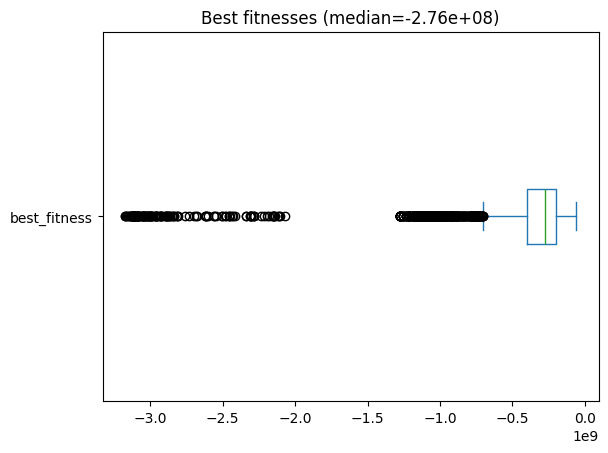

In [80]:
#df.boxplot(column=["best_fitness"], vert=False)
(df.best_fitness).plot.box(vert=False)
plt.title(f"Best fitnesses (median={round(df.best_fitness.median()):.2e})")

Text(0, 0.5, 'Best fitness')

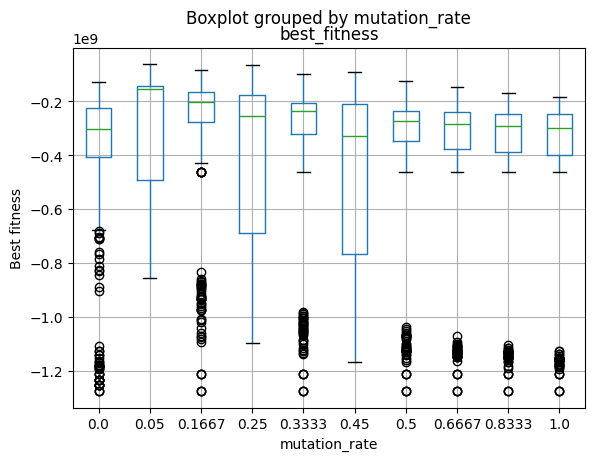

In [93]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="mutation_rate")
ax.set_ylabel("Best fitness")

Text(0, 0.5, 'Best fitness')

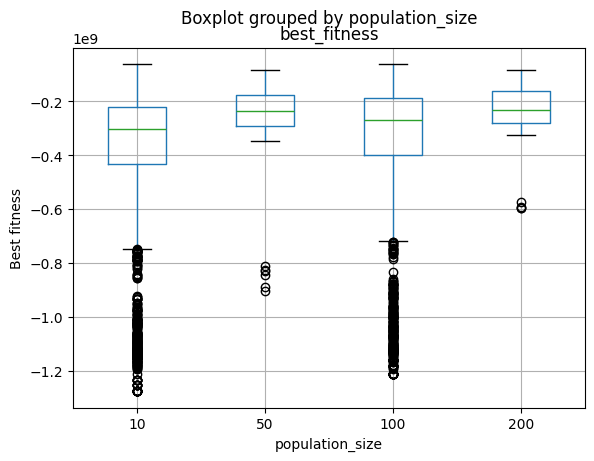

In [94]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="population_size")
ax.set_ylabel("Best fitness")

Text(0, 0.5, '')

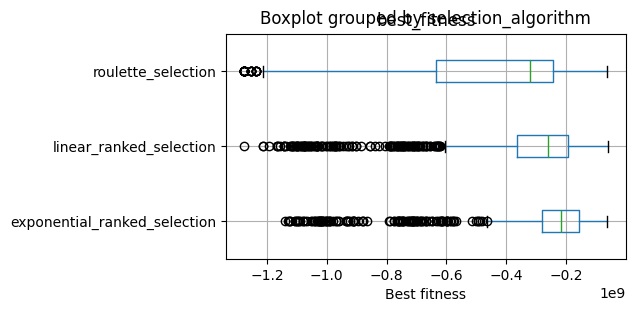

In [123]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="selection_algorithm", vert=False, figsize=(5, 3))
ax.set_xlabel("Best fitness")
ax.set_ylabel("")


Text(0, 0.5, '')

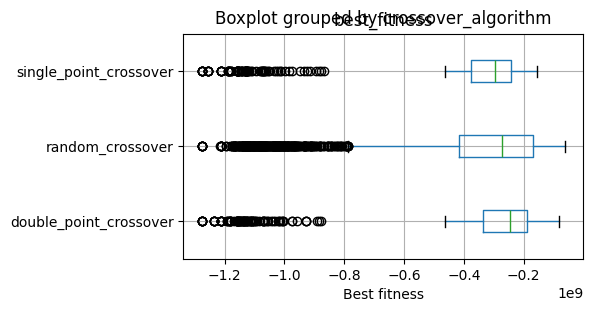

In [134]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="crossover_algorithm", vert=False, figsize=(5, 3))
ax.set_xlabel("Best fitness")
ax.set_ylabel("")

Text(0, 0.5, 'Best fitness')

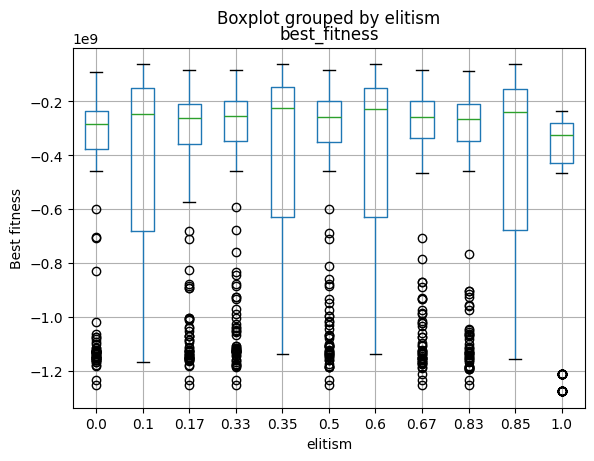

In [101]:
threshold = -1.5e9
ax = df[df.best_fitness > threshold].boxplot(column="best_fitness", by="elitism")
ax.set_ylabel("Best fitness")

Text(0.5, 0.98, 'Time step of termination (patience ~ 100)')

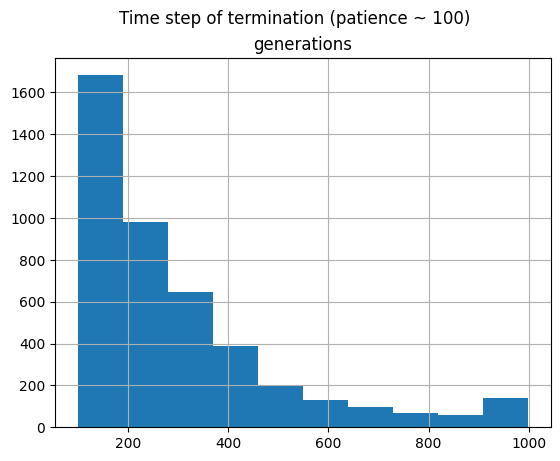

In [111]:
df.hist(column="generations")
plt.suptitle("Time step of termination (patience ~ 100)")
